In [1]:
!pip install concat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.7 MB/s eta 0:00:00


In [2]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [5]:
# data_importing
df = pd.read_csv(r"/content/GOOGLE.csv")
df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2018-06-21 00:00:00+00:00,1157.66,1177.295,1152.232,1174.85,1238118,57.8830,58.86475,57.61160,58.7425,24762360,0.0,1.0
1,GOOG,2018-06-22 00:00:00+00:00,1155.48,1162.497,1147.260,1159.14,1310967,57.7740,58.12485,57.36300,57.9570,26219340,0.0,1.0
2,GOOG,2018-06-25 00:00:00+00:00,1124.81,1143.910,1112.780,1143.60,2157310,56.2405,57.19550,55.63900,57.1800,43146200,0.0,1.0
3,GOOG,2018-06-26 00:00:00+00:00,1118.46,1133.210,1116.659,1128.00,1563225,55.9230,56.66050,55.83295,56.4000,31264500,0.0,1.0
4,GOOG,2018-06-27 00:00:00+00:00,1103.98,1131.836,1103.620,1121.34,1293892,55.1990,56.59180,55.18100,56.0670,25877840,0.0,1.0


In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2018-06-21 00:00:00+00:00,1157.66,1177.295,1152.232,1174.85,1238118,57.8830,58.86475,57.61160,58.7425,24762360,0.0,1.0
1,GOOG,2018-06-22 00:00:00+00:00,1155.48,1162.497,1147.260,1159.14,1310967,57.7740,58.12485,57.36300,57.9570,26219340,0.0,1.0
2,GOOG,2018-06-25 00:00:00+00:00,1124.81,1143.910,1112.780,1143.60,2157310,56.2405,57.19550,55.63900,57.1800,43146200,0.0,1.0
3,GOOG,2018-06-26 00:00:00+00:00,1118.46,1133.210,1116.659,1128.00,1563225,55.9230,56.66050,55.83295,56.4000,31264500,0.0,1.0
4,GOOG,2018-06-27 00:00:00+00:00,1103.98,1131.836,1103.620,1121.34,1293892,55.1990,56.59180,55.18100,56.0670,25877840,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,GOOG,2023-06-12 00:00:00+00:00,124.35,124.75,122.350,123.395,22289632,124.35,124.75,122.350,123.395,22289632,0.0,1.0
1252,GOOG,2023-06-13 00:00:00+00:00,124.43,125.86,123.845,125.650,19287650,124.43,125.86,123.845,125.650,19287650,0.0,1.0
1253,GOOG,2023-06-14 00:00:00+00:00,124.38,124.79,122.160,123.800,24659620,124.38,124.79,122.160,123.800,24659620,0.0,1.0
1254,GOOG,2023-06-15 00:00:00+00:00,125.79,126.16,123.140,123.880,24517071,125.79,126.16,123.140,123.880,24517071,0.0,1.0
1255,GOOG,2023-06-16 00:00:00+00:00,124.06,126.70,123.790,126.700,56699200,124.06,126.70,123.790,126.700,56699200,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df.shape

(1256, 14)

In [10]:
df1

0       1157.66
1       1155.48
2       1124.81
3       1118.46
4       1103.98
         ...   
1251     124.35
1252     124.43
1253     124.38
1254     125.79
1255     124.06
Name: close, Length: 1256, dtype: float64

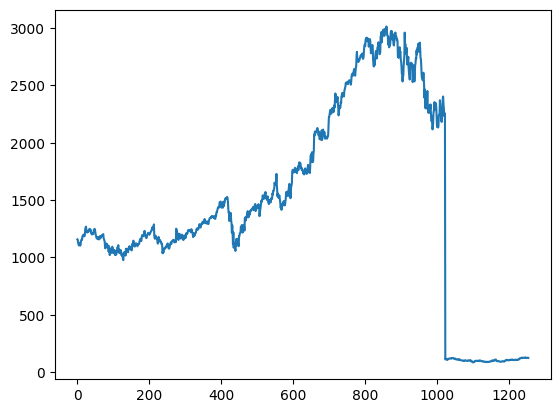

In [11]:
plt.plot(df1)

In [12]:
df1

0       1157.66
1       1155.48
2       1124.81
3       1118.46
4       1103.98
         ...   
1251     124.35
1252     124.43
1253     124.38
1254     125.79
1255     124.06
Name: close, Length: 1256, dtype: float64

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.36652461]
 [0.36578075]
 [0.35531564]
 ...
 [0.01395235]
 [0.01443346]
 [0.01384316]]


In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(816, 440)

In [20]:
train_data

array([[0.36652461],
       [0.36578075],
       [0.35531564],
       [0.35314892],
       [0.3482081 ],
       [0.35170216],
       [0.3521901 ],
       [0.35621987],
       [0.34783618],
       [0.35513139],
       [0.36055673],
       [0.36529282],
       [0.36487994],
       [0.36524163],
       [0.37533482],
       [0.37715692],
       [0.37546448],
       [0.38056226],
       [0.3795659 ],
       [0.37652225],
       [0.37582276],
       [0.38284841],
       [0.39737741],
       [0.40270721],
       [0.40428705],
       [0.39410855],
       [0.38770733],
       [0.38686111],
       [0.38779946],
       [0.38989453],
       [0.38906196],
       [0.38942365],
       [0.39537788],
       [0.3965346 ],
       [0.39772545],
       [0.39380487],
       [0.39291771],
       [0.39533693],
       [0.38587841],
       [0.38318621],
       [0.38129928],
       [0.38362297],
       [0.38152449],
       [0.38347283],
       [0.38280746],
       [0.38801784],
       [0.39524139],
       [0.391

In [23]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
print(X_train)

[[0.36652461 0.36578075 0.35531564 ... 0.34459462 0.34084465 0.33529988]
 [0.36578075 0.35531564 0.35314892 ... 0.34084465 0.33529988 0.3259096 ]
 [0.35531564 0.35314892 0.3482081  ... 0.33529988 0.3259096  0.32502926]
 ...
 [0.75402038 0.74536372 0.76153056 ... 0.96024486 0.96044959 0.94002778]
 [0.74536372 0.76153056 0.76543408 ... 0.96044959 0.94002778 0.95056454]
 [0.76153056 0.76543408 0.75873941 ... 0.94002778 0.95056454 0.95016191]]


In [27]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [28]:
print(X_test.shape), print(y_test.shape)


(339, 100)
(339,)


(None, None)

In [29]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [30]:
model= Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 3s 279ms/step - loss: 2.8061e-04 - val_loss: 0.0077
Epoch 2/100
12/12 [==============================] - 4s 361ms/step - loss: 2.7082e-04 - val_loss: 0.0082
Epoch 3/100
12/12 [==============================] - 3s 279ms/step - loss: 3.0340e-04 - val_loss: 0.0073
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 2.5558e-04 - val_loss: 0.0075
Epoch 5/100
12/12 [==============================] - 4s 376ms/step - loss: 2.5224e-04 - val_loss: 0.0073
Epoch 6/100
12/12 [==============================] - 3s 287ms/step - loss: 2.5939e-04 - val_loss: 0.0070
Epoch 7/100
12/12 [==============================] - 3s 250ms/step - loss: 2.8970e-04 - val_loss: 0.0067
Epoch 8/100
12/12 [==============================] - 3s 247ms/step - loss: 2.7556e-04 - val_loss: 0.0073
Epoch 9/100
12/12 [==============================] - 4s 371ms/step - loss: 2.6791e-04 - val_loss: 0.0068
Epoch 10/100
12/12 [==============================] - 3

In [35]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


In [36]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1667.5225341122045

In [38]:
math.sqrt(mean_squared_error(y_test,test_predict))

1489.2615729664183

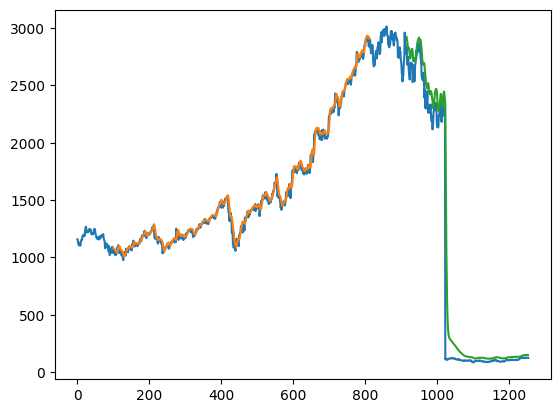

In [39]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] =np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] =train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] =numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

440

In [41]:
len(train_data)

816

In [42]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.02230645]
101
1 day input [0.00534686 0.00587575 0.00493399 0.00558913 0.00612143 0.00863619
 0.00741464 0.00681751 0.00837687 0.00563349 0.00408436 0.00387963
 0.0039274  0.00391034 0.00464396 0.00419355 0.0037875  0.00292081
 0.00283551 0.00258642 0.00199953 0.00225544 0.00232368 0.00239534
 0.00300953 0.00359301 0.00412531 0.00364419 0.00380798 0.00312896
 0.00256595 0.00278774 0.00367149 0.00445629 0.00599859 0.00647288
 0.00629203 0.00762619 0.00707342 0.0077695  0.00770126 0.00667761
 0.00609754 0.0062818  0.00608389 0.00699835 0.00730886 0.00738051
 0.00732251 0.00867031 0.00800494 0.00772173 0.00741464 0.00842805
 0.00886139 0.0078241  0.00738051 0.00734639 0.00764666 0.00765008
 0.00794693 0.00720649 0.0071519  0.00848947 0.00843829 0.00826427
 0.00767396 0.00772173 0.00741122 0.00775415 0.00844511 0.00834275
 0.00982363 0.01140005 0.01174809 0.01142052 0.01248853 0.01296282
 0.0136589  0.01356677 0.01446076 0.01358042 0.01301741 0.01394211
 0.01431062 0.01404106 0.01360772

In [45]:
day_new= np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
len(df1)

1256

In [47]:
df3=df1.tolist()
df3.extend(lst_output)

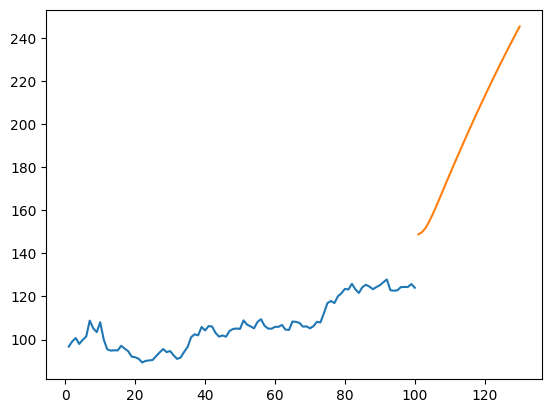

In [48]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

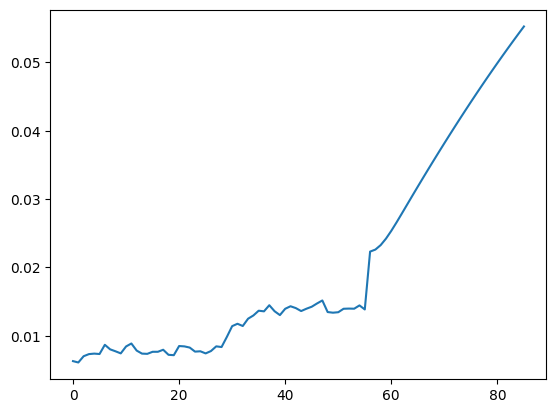

In [49]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

# **THANK YOU**